In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
# Importing a dataset
data =  pd.read_csv('data/for_model.csv', index_col = [0])
y = pd.read_csv("data/for_model_y.csv", index_col = [0])

In [3]:
data.head()

,location,location_population,occupation,hobbies,friends_number,sex,credit_card_type,relationship_status,education,dob,daily_commute
0,Chrzanów,37123,Numerical and material recording clerks,"Stretching,Cooking,Parkour",268,1.0,Visa,In relationship,3.0,34.0,32.0
1,Konstancin-Jeziorna,17191,Production and specialised services managers,"Squash,Cardio,Astronomy",204,0.0,Mastercard,In relationship,3.0,36.0,5.0
2,Stalowa Wola,61903,Personal care workers,"Cardio,Power bike,Wood carving,Acting,Rappelling",128,1.0,Visa,In relationship,3.0,23.0,18.0
3,Braniewo,17074,"Armed forces occupations, other ranks","Bodybuilding,Fitness,Skimboarding",156,1.0,Visa,Married with kids,5.0,56.0,76.0
4,Sieniawa,2146,General and keyboard clerks,"Cardio,Rowing,Gym,Dowsing",182,0.0,Visa,In relationship,5.0,37.0,45.0


We can see that the data is less because we are only working on training data

In [4]:
NA = pd.DataFrame(data=[data.notna().sum().tolist(),
            data.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (data.isna().sum()/data.shape[0]*100).tolist()]], 
           columns=data.columns, index=['Not NA Count', 'NA Count', 'NA Percent']).transpose()
NA

,Not NA Count,NA Count,NA Percent
location,2800,0,0.00%
location_population,2800,0,0.00%
occupation,2800,0,0.00%
hobbies,2322,478,17.07%
friends_number,2800,0,0.00%
sex,2800,0,0.00%
credit_card_type,2800,0,0.00%
relationship_status,2800,0,0.00%
education,2800,0,0.00%
dob,2800,0,0.00%


Data that does not have missing values

In [5]:
data_no_na = data.dropna()
data_no_na.count()

location               2322
location_population    2322
occupation             2322
hobbies                2322
friends_number         2322
sex                    2322
credit_card_type       2322
relationship_status    2322
education              2322
dob                    2322
daily_commute          2322
dtype: int64

In [6]:
data_is_na = data[data.isna().any(axis=1)]
data_is_na

,location,location_population,occupation,hobbies,friends_number,sex,credit_card_type,relationship_status,education,dob,daily_commute
10,Hajnówka,20919,"Armed forces occupations, other ranks",NaN,254,1.0,American Express,Married with kids,5.0,68.0,64.000000
11,Jastrzębie-Zdrój,89590,"Legal, social and cultural professionals",NaN,341,1.0,Visa,Single,5.0,25.0,38.000000
12,Jastrzębie-Zdrój,89590,"Agricultural, forestry and fishery labourers",NaN,229,1.0,Mastercard,Married,2.0,53.0,37.000000
13,Jaworzno,92090,Commissioned armed forces officers,NaN,244,0.0,Visa,In relationship,5.0,27.0,21.000000
34,Bytom,168394,Other clerical support workers,NaN,267,1.0,Visa,Married,2.0,57.0,88.000000
...,...,...,...,...,...,...,...,...,...,...,...
2760,Warszawa,1764615,"Legal, social, cultural and related associate ...",NaN,188,0.0,Visa,Single,2.0,22.0,5.000000
2776,Włocławek,111752,"Food processing, wood working, garment and oth...",NaN,307,1.0,Mastercard,In relationship,3.0,49.0,50.704293
2782,Tarnów,109650,Non-commissioned armed forces officers,NaN,296,1.0,Visa,Divorced,4.0,78.0,46.838235
2787,Kraków,767348,Market-oriented skilled agricultural workers,NaN,213,1.0,Mastercard,Married,1.0,68.0,50.000000


In [7]:
hobby_columns = data_no_na['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
hobby_columns.head()

,3D printing,Acting,Air sports,Amateur radio,Archery,Astronomy,BASE jumping,Backpacking,Badminton,Baseball,...,Wood carving,Woodworking,Worldbuilding,Writing,Yo-yoing,Yoga,amateur radio,role-playing games,scrapbook,tabletop games
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 174 different hobbies in the data we have

We examine what hobbies occur most frequently

In [8]:
hobb = hobby_columns.sum().sort_values(ascending=False)
hobb.head(20)

Gym                 183
Squash              183
Bodybuilding        178
Rowing              171
Cardio              161
Weightlifting       158
Badminton           149
Crossfit            147
Fitness             145
Stretching          143
Power bike          143
Kettleballs         135
Parkour              40
Poi                  39
Sculpting            39
Skydiving            36
Drama                36
Book restoration     36
Taxidermy            35
Geocaching           35
dtype: int64

We only choose the hobbies that are most common (greater than 100)

In [9]:
hobb_100 = hobb[hobb > 100]

In [10]:
part_hobbies = hobby_columns[hobb_100.index]
part_hobbies.head()

,Gym,Squash,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0,0


In [11]:
df = pd.DataFrame(data)

Divide dataset into training and test data 

In [12]:
part_hobbies

,Gym,Squash,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2794,0,0,0,0,0,0,0,0,0,0,0,0
2796,0,0,0,0,0,0,0,0,0,0,0,0
2797,0,0,0,0,0,0,0,0,0,0,0,0
2798,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_no_na, part_hobbies, test_size = 0.25, random_state=1)

Displaying the training set

In [14]:
y_train.head()

,Gym,Squash,Bodybuilding,Rowing,Cardio,Weightlifting,Badminton,Crossfit,Fitness,Stretching,Power bike,Kettleballs
1044,0,0,0,0,0,0,0,0,0,0,0,1
1291,1,0,0,0,1,0,0,0,0,0,0,0
671,0,0,1,0,0,0,0,0,0,0,0,0
1094,0,0,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
y_train.columns

Index(['Gym', 'Squash', 'Bodybuilding', 'Rowing', 'Cardio', 'Weightlifting',
       'Badminton', 'Crossfit', 'Fitness', 'Stretching', 'Power bike',
       'Kettleballs'],
      dtype='object')

In [16]:
y_train.sum()

Gym              130
Squash           129
Bodybuilding     137
Rowing           133
Cardio           109
Weightlifting    130
Badminton        112
Crossfit         100
Fitness          101
Stretching       113
Power bike       112
Kettleballs      105
dtype: int64

Jedna funkcja jedna rzecz

In [17]:
def hobbies_100(df):
    hobby_columns = df['hobbies'].str.get_dummies(',') # Save hobbies column as one hot encorder
    hobb = hobby_columns.sum().sort_values(ascending=False) # Sorting from largest to smallest
    hobb_100 = hobb[hobb > 100] # Choosing hobbies that repeat 100 or more times
    return hobby_columns[hobb_100.index] # saving the selected hobbies

In [18]:
def hot_encoder_revers(row):

    indices_with_one = [index for index, row in enumerate(row) if row == 1]

    if not indices_with_one:
        return 0
    elif len(indices_with_one) > 1:
        return 13
    else:
        return indices_with_one[0] + 1

Preparation of one variable that represents the hobby.  

The numbers sequentially represent:  
- 1 -> person does not have a hobby  
- 2 -> Gym
- 3 -> Squash
- 4 -> Bodybuilding	
- 5 -> Rowing
- 6 -> Cardio
- 7 -> Weightlifting
- 8 -> Badminton
- 9 -> Crossfit
- 10 -> Fitness
- 11 -> Stretching
- 12 -> Power bike
- 13 -> Kettleballs
- 14 -> Has more than one hobby

In [19]:
y_train_one_col = hobbies_100(df).apply(hot_encoder_revers, axis=1).values
print(y_train_one_col)

[10 13 13 ...  0  0  5]


In [20]:
def one_hot_column(df, col):
    hot_col = df[col].str.get_dummies() # Application of one hot encoding
    return hot_col.drop(hot_col.columns[0], axis=1) # reduction in the number of columns

In [21]:
def t_function(df):
    hot_credit_card_type = one_hot_column(df,'credit_card_type')
    hot_relationship_status = one_hot_column(df,'relationship_status')

    # Linking tables with data as one hot encoder
    df = pd.concat([df, hot_relationship_status], axis=1)
    df = pd.concat([df, hot_credit_card_type], axis=1)

    df = df.drop(columns=['location', 'occupation', 'credit_card_type', 'hobbies', 'relationship_status']) # Deleting columns
    return df

In [22]:
X_train.head()

,location,location_population,occupation,hobbies,friends_number,sex,credit_card_type,relationship_status,education,dob,daily_commute
1044,Żabno,4248,Science and engineering associate professionals,"Kettleballs,Scouting,Rappelling",229,0.0,Mastercard,In relationship,5.0,45.0,35.0
1291,Chrzanów,37123,Sales workers,"Cardio,Gym,Do it yourself",236,0.0,Visa,Married,2.0,42.0,31.0
671,Stalowa Wola,61903,Administrative and commercial managers,"Bodybuilding,3D printing",209,0.0,Mastercard,Married with kids,2.0,65.0,55.0
1094,Konstancin-Jeziorna,17191,Information and communications technology prof...,Magic,253,1.0,Visa,In relationship,4.0,25.0,89.0
885,Chorzów,109021,Handicraft and printing workers,"3D printing,Foraging,Shooting",312,1.0,Mastercard,Married,4.0,42.0,89.0


In [23]:
# X_train_trans = transform_function(X_train, True)
X_train_trans = t_function(X_train)

In [24]:
X_train_trans.head()

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
1044,4248,229,0.0,5.0,45.0,35.0,1,0,0,0,1,0,0
1291,37123,236,0.0,2.0,42.0,31.0,0,1,0,0,0,0,1
671,61903,209,0.0,2.0,65.0,55.0,0,0,1,0,1,0,0
1094,17191,253,1.0,4.0,25.0,89.0,1,0,0,0,0,0,1
885,109021,312,1.0,4.0,42.0,89.0,0,1,0,0,1,0,0


Training the model on the training group and then applying the model to the data for the group with barracking data. -> creating a df with the results  
Each column has its own Logistic regression model

Zmienne ilościowe, wartości odstające - sprawdzić skośność 

In [25]:
X_train_trans[['location_population','friends_number', 'dob', 'daily_commute']].skew()

location_population    2.143456
friends_number         0.129495
dob                    0.241663
daily_commute          0.031308
dtype: float64

X_train_trans.describe()

In [26]:
X_train_trans['location_population'].max()

1764615

In [27]:
X_train_trans['location_population'].mean()

313846.7386559449

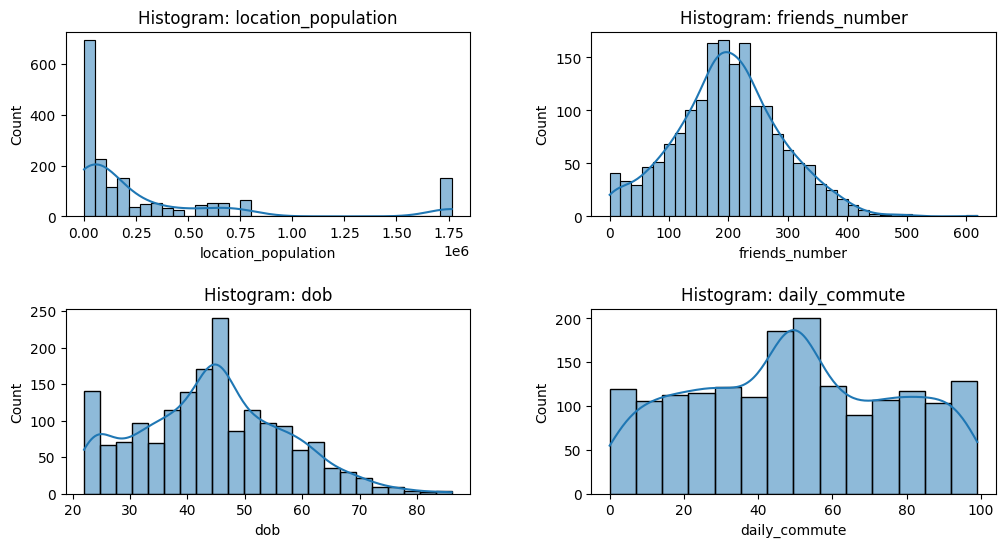

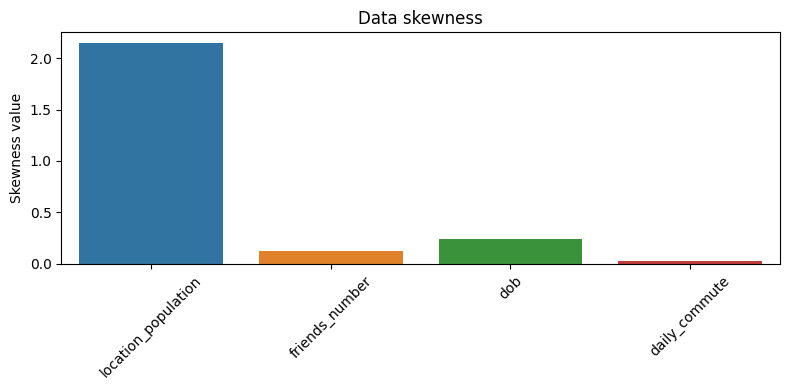

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Przykładowe dane - zakładam, że masz już załadowane dane w zmiennej X_train_trans
# X_train_trans = ...

# Wybieram tylko kolumny do analizy
columns_to_analyze = ['location_population', 'friends_number', 'dob', 'daily_commute']
data_to_analyze = X_train_trans[columns_to_analyze]

# Tworzę wykresy
plt.figure(figsize=(12, 6))

# Tworzenie histogramów dla każdej zmiennej
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_to_analyze[column], kde=True)
    plt.title(f'Histogram: {column}')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Tworzenie wykresu skośności (skewness)
skewness_values = data_to_analyze.skew()
plt.figure(figsize=(8, 4))
sns.barplot(x=skewness_values.index, y=skewness_values.values)
plt.title('Data skewness')
plt.xticks(rotation=45)
plt.ylabel('Skewness value')

plt.tight_layout()
plt.show()


In [29]:
X_train_trans.head()

,location_population,friends_number,sex,education,dob,daily_commute,In relationship,Married,Married with kids,Single,Mastercard,Revolut,Visa
1044,4248,229,0.0,5.0,45.0,35.0,1,0,0,0,1,0,0
1291,37123,236,0.0,2.0,42.0,31.0,0,1,0,0,0,0,1
671,61903,209,0.0,2.0,65.0,55.0,0,0,1,0,1,0,0
1094,17191,253,1.0,4.0,25.0,89.0,1,0,0,0,0,0,1
885,109021,312,1.0,4.0,42.0,89.0,0,1,0,0,1,0,0


Training the models  

Each hobby for which we want to get a forecast has its own model 

y_train - zamineić na jedną kolumnę 

In [30]:
y_train.columns

Index(['Gym', 'Squash', 'Bodybuilding', 'Rowing', 'Cardio', 'Weightlifting',
       'Badminton', 'Crossfit', 'Fitness', 'Stretching', 'Power bike',
       'Kettleballs'],
      dtype='object')

dodać RFE

In [31]:
trained_models = {} # Dict with models


for hobby in y_train.columns:
    model = LogisticRegression()
    model.fit(X_train_trans, np.array(y_train[hobby].values))
    trained_models[hobby] = model # save trained models to dict

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

trained_models = {}  # Dict with models

# Assuming you have X_train_trans and y_train defined
# X_train_trans is your feature matrix
# y_train is your target variable dataframe

for hobby in y_train.columns:
    model = LogisticRegression()
    model.fit(X_train_trans, np.array(y_train[hobby].values))
    trained_models[hobby] = model  # save trained models to dict

def apply_rfe(trained_models, X_train, num_features_to_select=5):
    selected_features = {}

    for hobby, model in trained_models.items():
        rfe = RFE(model, n_features_to_select=num_features_to_select)
        rfe.fit(X_train, np.array(y_train[hobby].values))
        selected_features[hobby] = {
            "selected_features": X_train.columns[rfe.support_],
            "ranking": rfe.ranking_
        }

    return selected_features

# Call the function and pass your X_train_trans
selected_features = apply_rfe(trained_models, X_train_trans)

# Now you can access the selected features and their rankings for each hobby
for hobby, features_info in selected_features.items():
    print(f"Hobby: {hobby}")
    print("Selected Features:", features_info['selected_features'])
    print("Feature Ranking:", features_info['ranking'])
    print()


c:\Users\Bartosz\Documents\code\python\Gym_Subscription\Gym_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Bartosz\Documents\code\python\Gym_Subscription\Gym_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Hobby: Gym
Selected Features: Index(['sex', 'Married with kids', 'Single', 'Mastercard', 'Visa'], dtype='object')
Feature Ranking: [9 8 1 4 5 7 6 3 1 1 1 2 1]

Hobby: Squash
Selected Features: Index(['Married', 'Married with kids', 'Single', 'Mastercard', 'Visa'], dtype='object')
Feature Ranking: [9 8 4 3 6 7 2 1 1 1 1 5 1]

Hobby: Bodybuilding
Selected Features: Index(['sex', 'Married with kids', 'Single', 'Mastercard', 'Revolut'], dtype='object')
Feature Ranking: [9 8 1 3 5 7 2 6 1 1 1 1 4]

Hobby: Rowing
Selected Features: Index(['sex', 'In relationship', 'Married', 'Mastercard', 'Revolut'], dtype='object')
Feature Ranking: [9 8 1 4 6 7 1 1 3 2 1 1 5]

Hobby: Cardio
Selected Features: Index(['sex', 'Married with kids', 'Single', 'Revolut', 'Visa'], dtype='object')
Feature Ranking: [9 8 1 5 6 7 3 4 1 1 2 1 1]

Hobby: Weightlifting
Selected Features: Index(['Married', 'Married with kids', 'Single', 'Mastercard', 'Visa'], dtype='object')
Feature Ranking: [9 8 3 4 6 7 5 1 1 1 1 2 1]

Ho

c:\Users\Bartosz\Documents\code\python\Gym_Subscription\Gym_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Application of trained models

In [33]:
selected_features

{'Gym': {'selected_features': Index(['sex', 'Married with kids', 'Single', 'Mastercard', 'Visa'], dtype='object'),
  'ranking': array([9, 8, 1, 4, 5, 7, 6, 3, 1, 1, 1, 2, 1])},
 'Squash': {'selected_features': Index(['Married', 'Married with kids', 'Single', 'Mastercard', 'Visa'], dtype='object'),
  'ranking': array([9, 8, 4, 3, 6, 7, 2, 1, 1, 1, 1, 5, 1])},
 'Bodybuilding': {'selected_features': Index(['sex', 'Married with kids', 'Single', 'Mastercard', 'Revolut'], dtype='object'),
  'ranking': array([9, 8, 1, 3, 5, 7, 2, 6, 1, 1, 1, 1, 4])},
 'Rowing': {'selected_features': Index(['sex', 'In relationship', 'Married', 'Mastercard', 'Revolut'], dtype='object'),
  'ranking': array([9, 8, 1, 4, 6, 7, 1, 1, 3, 2, 1, 1, 5])},
 'Cardio': {'selected_features': Index(['sex', 'Married with kids', 'Single', 'Revolut', 'Visa'], dtype='object'),
  'ranking': array([9, 8, 1, 5, 6, 7, 3, 4, 1, 1, 2, 1, 1])},
 'Weightlifting': {'selected_features': Index(['Married', 'Married with kids', 'Single', 'M

In [34]:
pred_hobby_train = pd.DataFrame()

for hobby, model in trained_models.items():
    pred = model.predict(X_train_trans)
    pred_hobby_train[hobby] = pred


Dodać drzewa decyzyjne, XGBoost

Przewidywania tragiczne 

In [35]:
pred_hobby_train.sum()

Gym              0
Squash           0
Bodybuilding     0
Rowing           0
Cardio           0
Weightlifting    0
Badminton        0
Crossfit         0
Fitness          0
Stretching       0
Power bike       0
Kettleballs      0
dtype: int64

Czemu wynik jest tak wysoki??

## Checking the results for the training set

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, pred_hobby_train)
print("Prediction precision:", accuracy)


Prediction precision: 0.43767949454336585


## Checking the results for the test set

In [37]:
# X_test_trans = transform_function(X_test, True)
X_test_trans = t_function(X_test)

In [38]:
pred_hobby_test = pd.DataFrame()

for hobby, model in trained_models.items():
    pred = model.predict(X_test_trans)
    pred_hobby_test[hobby] = pred

In [39]:
accuracy = accuracy_score(y_test, pred_hobby_test)
print("Prediction precision:", accuracy)

Prediction precision: 0.4354561101549053


Saving models to a file in piccle format

In [40]:
with open('models/all_trained_hobby_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)


# XGBoost

In [41]:
y_train_one_col = y_train.apply(hot_encoder_revers, axis=1).values
y_test_one_col = y_test.apply(hot_encoder_revers, axis=1).values
X_train_trans = t_function(X_train)
X_test_trans = t_function(X_test)

# Dramat

In [42]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train_trans, y_train_one_col)
# make predictions for test data
y_pred = model.predict(X_test_trans)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test_one_col, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 38.21%
